<a href="https://colab.research.google.com/github/TharinduRewatha/TEnsor-flow-Learning/blob/master/My_first_Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [5]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

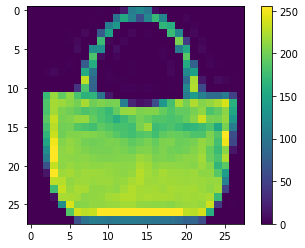

In [23]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=20)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4398 - accuracy: 0.8544
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4302 - accuracy: 0.8559
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4341 - accuracy: 0.8554
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4309 - accuracy: 0.8564
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4299 - accuracy: 0.8570
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4273 - accuracy: 0.8582
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4255 - accuracy: 0.8592
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4249 - accuracy: 0.8576
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4380 - accuracy: 0.8561
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.424

In [27]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.6710 - accuracy: 0.8247
Test accuracy: 0.8246999979019165


In [13]:
predictions = model.predict(test_images)

In [14]:
predictions[0]

array([1.9287759e-17, 9.9790751e-16, 0.0000000e+00, 2.7006108e-12,
       0.0000000e+00, 4.0477041e-02, 9.8987811e-22, 1.1311212e-02,
       5.1206055e-13, 9.4821173e-01], dtype=float32)

In [15]:
np.argmax(predictions[0])

9

In [16]:
test_labels[0]

9

Pick a number: 78


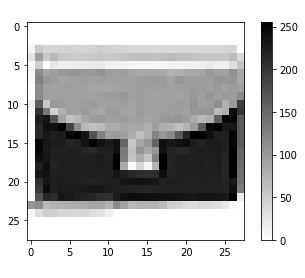

In [31]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)